In [11]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings
do_compile = True
threads = 7

# problem: prøv at droppe love, måske virker testen så?

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


# Solve the model

In [12]:
# compile c++ files
T = 20
specs = {  
    #'model FC, NO_HK ':{'latexname':'limited', 'par':{ 'T':T,'do_HK': False, 'threads':threads,'bargaining':0}},
    #'model LC, NO_HK ':{'latexname':'limited', 'par':{ 'T':T,'do_HK': False, 'threads':threads,'bargaining':1}},
    #'model NC, NO_HK ':{'latexname':'limited', 'par':{ 'T':T,'do_HK': False, 'threads':threads,'bargaining':2}},
    'model FC, HK ':{'latexname':'limited', 'par':{ 'T':T,'do_HK': True, 'threads':threads,'bargaining':0}},
    'model LC, HK ':{'latexname':'limited', 'par':{ 'T':T,'do_HK': True, 'threads':threads,'bargaining':1}},
    'model NC, HK ':{'latexname':'limited', 'par':{ 'T':T,'do_HK': True, 'threads':threads,'bargaining':2}},

}




# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    print(f'{name} loading...',end='')
    
    # setup model
    models[name] = LimitedCommitmentModelClass(name=name,par=spec['par'])
    models[name].spec = spec

    compile_now = True if do_compile & (m==0) else False
    models[name].link_to_cpp(force_compile=compile_now)
    
    print(' solving...')
    %time models[name].solve() 

model FC, HK  loading... solving...
CPU times: total: 2h 42min 40s
Wall time: 26min 51s
model LC, HK  loading... solving...
CPU times: total: 2h 41min 13s
Wall time: 25min 52s
model NC, HK  loading... solving...
CPU times: total: 2h 49min 29s
Wall time: 30min 18s


In [15]:


#model = models['model FC, NO_HK ']
#model.sim.init_love[:] =0.2
##model.simulate()
#print('HK')*
#print(f'Couple {np.mean(model.sim.couple,0)}')

#print(f'Laborw {np.mean(model.sim.labor_w,0)}')
#print(f'Laborm {np.mean(model.sim.labor_m,0)}')
#print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
#print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
#print(f'Asset {np.nanmean(model.sim.A,0)}')
#print(f'HKw {np.mean(model.sim.Kw,0)}')
#print(f'HKm {np.mean(model.sim.Km,0)}')
#temp = model.sim.power
#I = model.sim.couple<1
#nan = np.zeros(I.shape)
#nan[I] = np.nan
#temp = np.nanmean(temp + nan,axis=0)
#print(f'Power {temp}')



model = models['model NC, HK ']
model.sim.init_love[:] =0.1
model.sim.init_A[:] = 6.0
model.simulate()
print('NO hk')

i = 10
#note kvinden tjenner fx meget mere i en periode: 
    #højere barganing --> hun arbjeder mnindre , mand mere
    # højere indkomst --> hun og hendes mand arbjeder mindre. Dermed skal X5 påvirkes også her (INDKOMSTEFFEKT)
print(f'Person i, init Kw {model.sim.init_Kw[i]}')
print(f'Person i, init Km {model.sim.init_Km[i]}')
print(f'Person i, power {model.sim.power[i,:]}')
print(f'Person i, Kw {model.sim.Kw[i]}')
print(f'Person i, Km {model.sim.Km[i]}')
print(f'Person i, Laborw {model.sim.labor_w[i]}')
print(f'Person i, Laborm {model.sim.labor_m[i]}')
print(f'Person i, A {model.sim.A[i]}')
print(f'Person i, Aw {model.sim.Aw[i]}')
print(f'Person i, Am {model.sim.Am[i]}')
print(f'Person i, consw {model.sim.cons_w[i]}')
print(f'Couple {np.mean(model.sim.couple,0)}')

print(f'Laborw {np.mean(model.sim.labor_w,0)}')
print(f'Laborm {np.mean(model.sim.labor_m,0)}')
print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
print(f'Asset {np.nanmean(model.sim.A,0)}')
print(f'Asset min {np.nanmin(model.sim.A,0)}')
print(f'Asset max {np.nanmax(model.sim.A,0)}')
print(f'Asset W {np.nanmean(model.sim.Aw,0)}')
print(f'Asset M {np.nanmean(model.sim.Am,0)}')
print(f'HKw {np.mean(model.sim.Kw,0)}')
print(f'HKm {np.mean(model.sim.Km,0)}')
print(f'HKw max {np.max(model.sim.Kw,0)}')
print(f'HKm max {np.max(model.sim.Km,0)}')
print(f'HKw min {np.min(model.sim.Kw,0)}')
print(f'HKm min {np.min(model.sim.Km,0)}')
print(f'Power mean {np.mean(model.sim.power,0)}')
print(f'Power min {np.min(model.sim.power,0)}')
print(f'Power max {np.max(model.sim.power,0)}')




NO hk
Person i, init Kw 2.362841749048326
Person i, init Km 1.288276815639169
Person i, power [ 0.26936306  0.24602511  0.24602293  0.24601741  0.04607403  0.24601981
  0.75397188  0.61466777  0.30262515  0.03833693  0.2045297   0.19586446
  0.15304827  0.14485745  0.15304827 -1.         -1.         -1.
 -1.         -1.        ]
Person i, Kw [ 2.36284175  7.92890292  7.79329366  7.37586777  9.68305568 10.63153223
  9.77094048  5.2340371   3.98721416  1.58550308  1.97424667  3.04312299
  2.12392884  7.08034242  6.35970952  3.82609404  2.76472646  1.74369234
  1.49964208  1.26749581]
Person i, Km [ 1.28827682  3.74149968  4.18854283  5.15807099  4.26802969 10.91454954
  8.85559578  9.40779358  6.6959136   5.87042717 15.38381793 13.07965287
 20.         18.55478688 20.          9.84484688  5.04375016  3.1274641
  1.30026049  1.23034695]
Person i, Laborw [0.9999994  1.         1.         1.         1.         1.
 0.51255665 0.36789586 1.         1.         1.         1.
 0.75032604 0.44871

1.211637808507624
1.0732174558941234
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]
1.0467818742479826
1.014654196770772
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]
power mean [0.5      0.5      0.5      0.5      0.5      0.5      0.5      0.499925
 0.499925 0.49985  0.4997   0.4994   0.499025 0.498575 0.498275 0.49745
 0.496475 0.49535  0.49385  0.4922  ]
power min [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5 -1.  -1.  -1.  -1.  -1.  -1.  -1.
 -1.  -1.  -1.  -1.  -1.  -1. ]
power max [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]
Kw [1.47126839 1.94690543 2.90897843 3.66227634 4.42732947 5.2477035
 5.69764106 6.30553804 7.28328528 7.34640715 7.71281404 7.97937367
 8.63007881 8.61750013 9.10276488 8.95932038 9.31180658 9.06842434
 9.10463596 8.72201991]
[0. 0. 0. ... 0. 0. 0.]
[[0.0899081  0.00199577]
 [0.00199577 0.00011021]]
[[ 8.99080990e-02 -2.07956616e-05]
 [-2.07956616e-05  6.967

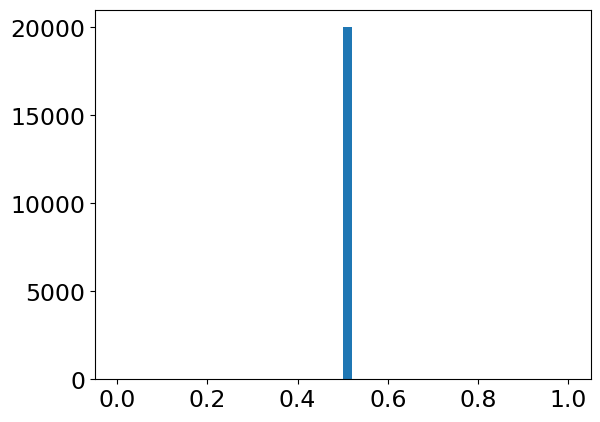

[[0.         0.        ]
 [0.         0.25001129]]


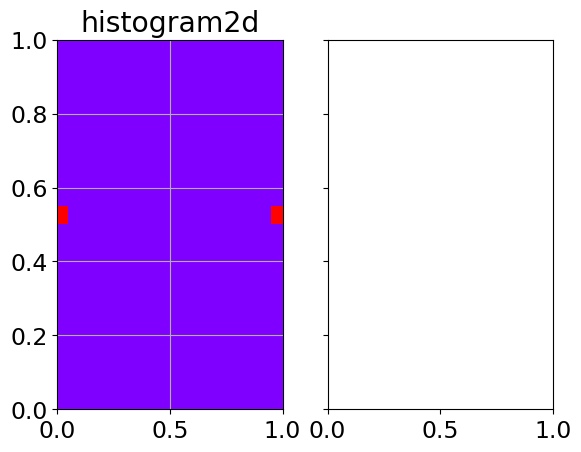

In [5]:

i = 10
print(model.sim.init_Kw[i])
print(model.sim.init_Km[i])
print(model.sim.power[i,:])



i = 1
print(model.sim.init_Kw[i])
print(model.sim.init_Km[i])
print(model.sim.power[i,:])



t = 4
print(f'power mean {np.mean(model.sim.power,0)}')
print(f'power min {np.min(model.sim.power,0)}')
print(f'power max {np.max(model.sim.power,0)}')
print(f'Kw {np.max(model.sim.Kw,0)}')


I = model.sim.couple[:,t]<1.0
nan = np.zeros(I.shape)
nan[I] = np.nan
print(nan)

init_barg = model.sim.init_Kw > model.sim.init_Km
init_barg = init_barg+nan

sim_power= model.sim.power[:,t]
sim_power= sim_power+ nan



print(np.cov(model.sim.Kw[:,t],model.sim.labor_w[:,t]))

print(np.cov(model.sim.Kw[:,t],model.sim.labor_w[:,t-1]))

print(np.cov(model.sim.Kw[:,t-1],model.sim.labor_w[:,t]))


print(init_barg)
plt.hist(model.sim.power[:,t], bins = 50 )
plt.show()

print(np.cov(model.sim.power[:,t],init_barg))
H, yedges, xedges = np.histogram2d(model.sim.power[:,t], init_barg, bins=20)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.pcolormesh(xedges, yedges, H, cmap='rainbow')
ax1.set_title('histogram2d')
ax1.grid()
plt.show()

0.11111111111111116
[-6.01124169 -5.99936455 -5.98774014 -5.97635965 -5.96521665 -5.95430338
 -5.94361256 -5.9331241  -5.92266486 -5.91225279 -5.90188508 -5.89152805
 -5.88120971 -5.87088497 -5.86059142 -5.85030212 -5.84000138 -5.82969434
 -5.81938261 -5.80903985 -5.79866799 -5.78826339 -5.77783088 -5.76733971
 -5.75680618 -5.74620731 -5.73553927 -5.7247929  -5.71396115 -5.70304918
 -5.69201795 -5.68089593 -5.66962915 -5.6582461  -5.64674138 -5.63501871
 -5.62313819 -5.61110312 -5.59878474 -5.58624718 -5.57343838 -5.5603093
 -5.54684013 -5.53293926 -5.51853899 -5.50353903 -5.48779046 -5.47104718
 -5.4529086  -5.43239816]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[0.56533449 0.55271793 0.53975374 0.52848217 0.51684102 0.5054965
 0.49445438 0.48684861 0.48330542 0.47726875 0.4727824  0.46934817
 0.4639644  0.4614775  0.45534673 

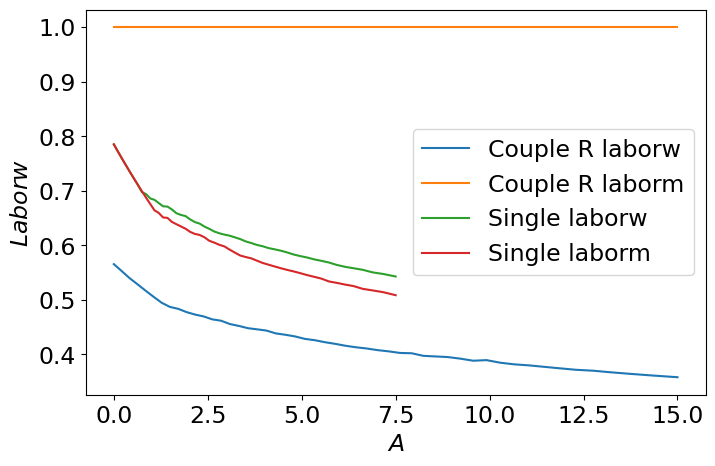

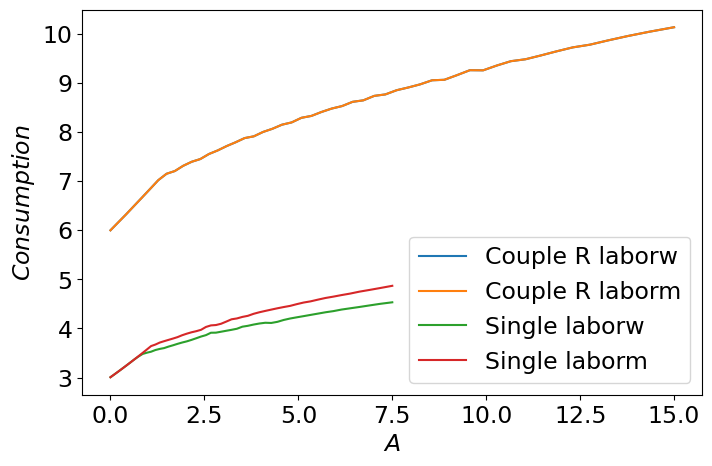

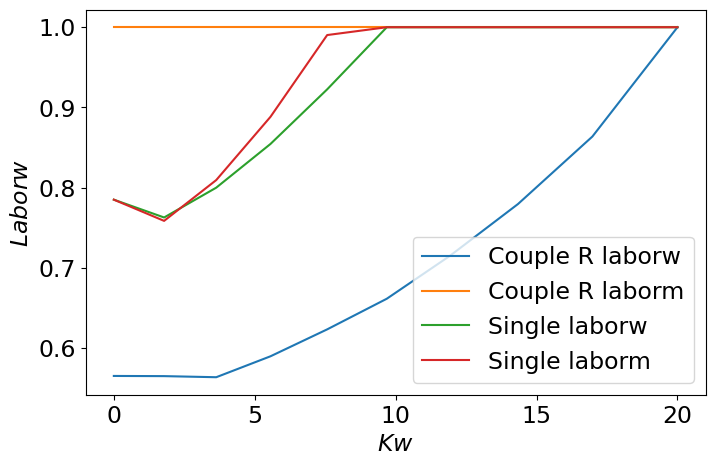

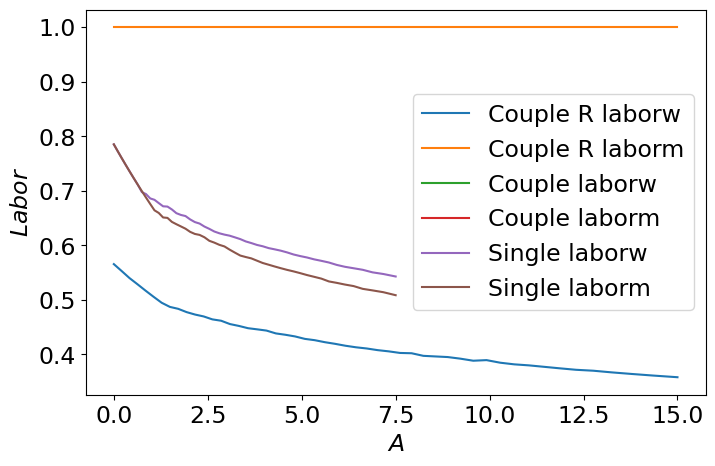

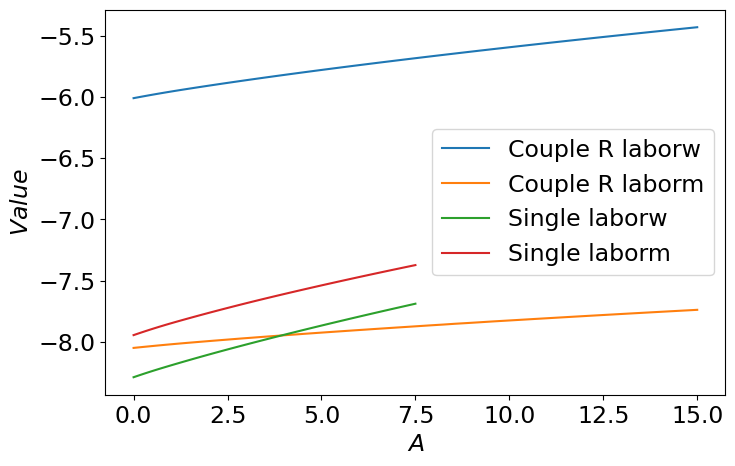

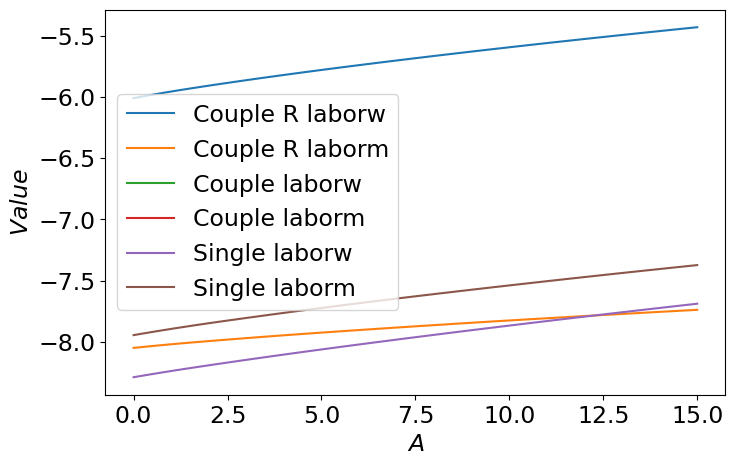

In [22]:
i_P = 20
#i_P = 8
i_A = 0
i_L = 5
i_t = 1
i_HKw = 0
i_HKm = 0
t = i_t


#sol = models['model 2'].sol
#par = models['model 2'].par


#print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_single[t,:,i_HKm])


sol = models['model NC, NO_HK '].sol
par = models['model NC, NO_HK '].par
print(par.grid_love[i_L])

print(sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])


print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])

print(sol.labor_w_single[t,:,i_HKw])
print(sol.labor_m_single[t,:,i_HKw])


print(sol.Vw_single[t,:,i_HKw])




fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.labor_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_Aw,sol.labor_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_Am,sol.labor_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.cons_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.cons_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_Aw,sol.cons_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_Am,sol.cons_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Consumption$")
plt.legend()
plt.show()




fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_K,sol.labor_w_remain_couple[t,i_P,i_L,i_A,:,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_K,sol.labor_m_remain_couple[t,i_P,i_L,i_A,:,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_K,sol.labor_w_single[t,i_A,:], label = 'Single laborw')
ax.plot(par.grid_K,sol.labor_m_single[t,i_A,:], label = 'Single laborm')                      
ax.set_xlabel(f"$Kw$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.labor_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_A,sol.labor_m_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborm')
ax.plot(par.grid_Aw,sol.labor_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_Am,sol.labor_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Labor$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.Vm_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_Aw,sol.Vw_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_Am,sol.Vm_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.Vm_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.Vw_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_A,sol.Vm_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborm')
ax.plot(par.grid_A,sol.Vw_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.Vm_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()



# Estimate the model

In [18]:
#Save the data 
#model = models['model LC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 1, end_p = 19, to_xl = True, name_xl = 'simulated_data_LC_NO_HK2')


model = models['model LC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 7, to_xl = True, name_xl = 'simulated_data_LC_HK')

#model = models['model NC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 1, end_p = 19, to_xl = True, name_xl = 'simulated_data_NC_NO_HK2')


model = models['model NC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 7, to_xl = True, name_xl = 'simulated_data_NC_HK')

#Save the data 
#model = models['model FC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 1, end_p = 19, to_xl = True, name_xl = 'simulated_data_FC_NO_HK2')


model = models['model FC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 7, to_xl = True, name_xl = 'simulated_data_FC_HK')


In [6]:

#Estimate the model one time
data_reg = Estimate.aux_est(data2,print_reg=True)
data_reg, Wald_FC, Wald_NC = Estimate.main_est(data_reg,print_reg=True) 

c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ZeroDivisionError: float division by zero